Getting data using xarray from ERSST


In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.colors import CenteredNorm
from scipy import stats, signal
from cartopy import crs as ccrs, feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Imports

import xarray as xr

import geoviews as gv
import geoviews.feature as gf

from geoviews import opts
from cartopy import crs

#gv.extension('bokeh', 'matplotlib')

In [3]:
data_url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
sst = xr.open_dataset(data_url).sst


In [4]:
sst

<xarray.DataArray 'sst' (time: 2047, lat: 89, lon: 180)> Size: 131MB
[32792940 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-07-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [4]:
#access the attributes
attributes = sst.attrs
print("Attributes:", attributes)

Attributes: {'long_name': 'Monthly Means of Sea Surface Temperature', 'units': 'degC', 'var_desc': 'Sea Surface Temperature', 'level_desc': 'Surface', 'statistic': 'Mean', 'dataset': 'NOAA Extended Reconstructed SST V5', 'parent_stat': 'Individual Values', 'actual_range': array([-1.8    , 42.32636], dtype=float32), 'valid_range': array([-1.8, 45. ], dtype=float32), '_ChunkSizes': array([  1,  89, 180], dtype=int32)}


In [45]:
#plot with a single time step
sst.isel(time=5).plot()


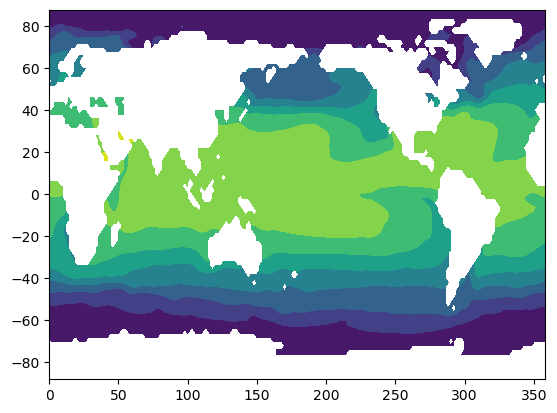

In [10]:
plt.contourf(sst.lon,sst.lat,sst.isel(time=30))

In [11]:
# convert lon coordinates from 0:360 to -180:180
sst.coords['lon'] = (sst.coords['lon'] + 180) % 360 - 180
sst = sst.sortby(sst.lon)


In [15]:
sst

<xarray.DataArray 'sst' (time: 2047, lat: 89, lon: 180)> Size: 131MB
[32792940 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-07-01
  * lon      (lon) float32 720B -180.0 -178.0 -176.0 ... 174.0 176.0 178.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [9]:
print(sst)

<xarray.DataArray 'sst' (time: 2047, lat: 89, lon: 180)> Size: 131MB
[32792940 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-07-01
  * lon      (lon) float32 720B -180.0 -178.0 -176.0 ... 174.0 176.0 178.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]


In [12]:
# Select North Atlantic Region
# Note -- Lat [-90:90] Lon [0:360]
na_sst = sst.sel(lon=slice(-98,12), lat=slice(90,0))
na_sst

<xarray.DataArray 'sst' (time: 2047, lat: 45, lon: 56)> Size: 21MB
[5158440 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 180B 88.0 86.0 84.0 82.0 80.0 ... 8.0 6.0 4.0 2.0 0.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-07-01
  * lon      (lon) float32 224B -98.0 -96.0 -94.0 -92.0 ... 6.0 8.0 10.0 12.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

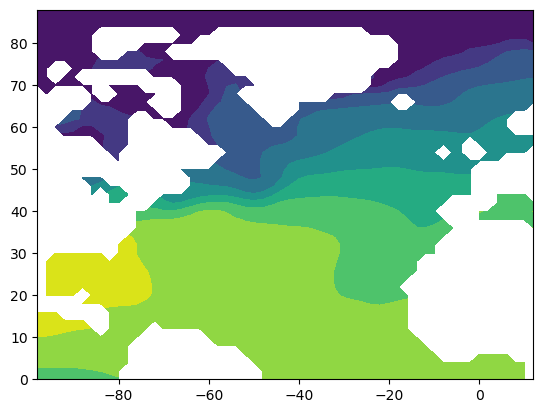

In [13]:
plt.contourf(na_sst.lon,na_sst.lat,na_sst.isel(time=30))

In [8]:
import pandas as pd

In [17]:
#select a single time point 
na_sst.sel(time='2014-01-01')

<xarray.DataArray 'sst' (lat: 45, lon: 56)> Size: 10kB
[2520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 180B 88.0 86.0 84.0 82.0 80.0 ... 8.0 6.0 4.0 2.0 0.0
    time     datetime64[ns] 8B 2014-01-01
  * lon      (lon) float32 224B -98.0 -96.0 -94.0 -92.0 ... 6.0 8.0 10.0 12.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [14]:
#single year
na_sst.sel(time='2014')

<xarray.DataArray 'sst' (time: 12, lat: 45, lon: 56)> Size: 121kB
[30240 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 180B 88.0 86.0 84.0 82.0 80.0 ... 8.0 6.0 4.0 2.0 0.0
  * time     (time) datetime64[ns] 96B 2014-01-01 2014-02-01 ... 2014-12-01
  * lon      (lon) float32 224B -98.0 -96.0 -94.0 -92.0 ... 6.0 8.0 10.0 12.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

In [ ]:
# This will return a subset of the dataset corresponding to the selected date range.
plt.plot(na_sst.sel(time=slice('2022-01-01', '2023-12-31')))

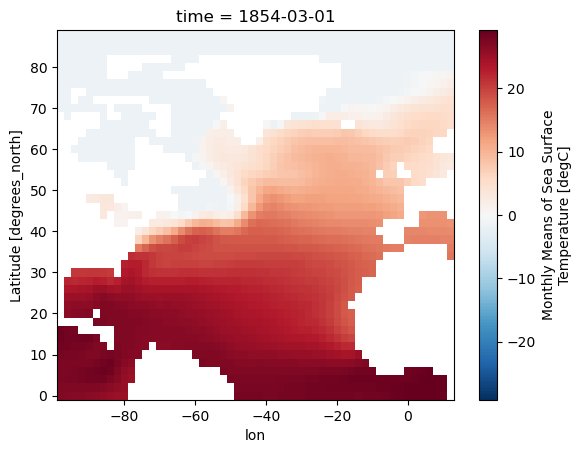

In [22]:
na_sst.isel(time=2).plot.pcolormesh()

In [21]:
#interactive map example 
from ipyleaflet import FullScreenControl, Map, Rectangle

min_lon, max_lon = -98, 12
min_lat, max_lat = 90, 0

rectangle = Rectangle(bounds=((0, -98), (90, 12)))

m = Map(
    center=((0 + 90) / 2, (12 + -98) / 2),
    zoom=6,
)

m.add_layer(rectangle)
m.add_control(FullScreenControl())
m

Map(center=[45.0, -43.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…